# Использование моделей МО для прогнозирования оттока клиентов телекоммуникационной компании

## Информация о проекте

**Описание проекта:** 
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.


**Цель проекта:** 
- построить модель, которая будет предсказывать, разорвёт ли абонент договор


**План работ:**
- Шаг 1. Загрузка данных
- Шаг 2. Исследовательский анализ и предобработка данных
- Шаг 3. Объединение данных
- Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма
- Шаг 5. Подготовка данных
- Шаг 6. Обучение моделей машинного обучения
- Шаг 7. Выбор лучшей модели
- Шаг 8. Общий вывод и рекомендации заказчику


**Описание услуг:**


Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).


Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
- Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.
  
**Описание данных:**

Данные состоят из нескольких файлов, полученных из разных источников:
<br/>
- Файл contract_new.csv — информация о договоре;
    - customerID — идентификатор абонента;
    - BeginDate — дата начала действия договора;
    - EndDate — дата окончания действия договора;
    - Type — тип оплаты: раз в год-два или ежемесячно;
    - PaperlessBilling — электронный расчётный лист;
    - PaymentMethod — тип платежа;
    - MonthlyCharges — расходы за месяц;
    - TotalCharges — общие расходы абонента.
      
<br/>

- Файл personal_new.csv  — персональные данные клиента;
    - customerID — идентификатор пользователя;
    - gender — пол;
    - SeniorCitizen — является ли абонент пенсионером;
    - Partner — есть ли у абонента супруг или супруга;
    - Dependents — есть ли у абонента дети.
 
<br/> 

- Файл internet_new.csv — информация об интернет-услугах;
    - customerID — идентификатор пользователя;
    - InternetService — тип подключения;
    - OnlineSecurity — блокировка опасных сайтов;
    - OnlineBackup — облачное хранилище файлов для резервного копирования данных;
    - DeviceProtection — антивирус;
    - TechSupport — выделенная линия технической поддержки;
    - StreamingTV — стриминговое телевидение;
    - StreamingMovies — каталог фильмов.

<br/> 


- Файл phone_new.csv — информация об услугах телефонии.
    - customerID — идентификатор пользователя;
    - MultipleLines — подключение телефона к нескольким линиям одновременно.

<br/> 

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

## Установка и импорт библиотек 

In [1]:
!pip install -Uq scikit-learn
!pip install -Uq phik

In [2]:
import shap
import phik
from phik import report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Загрузка данных

In [3]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv') 
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv') 
    phone = pd.read_csv('/datasets/phone_new.csv') 
    print('Данные загружены из datasets')
except:
    try:
        contract = pd.read_csv('contract_new.csv')
        personal = pd.read_csv('personal_new.csv') 
        internet = pd.read_csv('internet_new.csv') 
        phone = pd.read_csv('phone_new.csv') 
        print('Данные загружены из локальной среды')
    except:
        print('Something is wrong')

Данные загружены из локальной среды


In [4]:
contract.info()
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
personal.info()
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
phone.info()
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


**Вывод:** Данные соответствуют описанию задачи. Названия и типы некоторых столбцов необходимо будет изменить в соответствии со стандартами оформления данных на этапе предобработки.

## Исследовательский анализ и предобработка данных

In [8]:
# Приводим названия столбцов датафрейма contract к стандартному оформлению
contract.columns = ['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
                      'monthly_charges', 'total_charges']
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [9]:
# Приводим названия столбцов датафрейма contract к стандартному оформлению
personal.columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [10]:
# Приводим названия столбцов датафрейма contract к стандартному оформлению
internet.columns = ['customer_id', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support',
                      'streaming_tv', 'streaming_movies']
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [11]:
# Приводим названия столбцов датафрейма contract к стандартному оформлению
phone.columns = ['customer_id', 'multiple_lines']
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [12]:
# Изменение типа данных столбцов
contract['begin_date'] = pd.to_datetime(contract['begin_date'], errors='coerce')
contract['end_date'] = pd.to_datetime(contract['end_date'].replace('No', pd.NaT), errors='coerce')
contract['total_charges'] = pd.to_numeric(contract['total_charges'], errors='coerce')

contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [13]:
# Изменение типа данных столбцов
personal['senior_citizen'] = personal['senior_citizen'].astype('object')
personal['senior_citizen'] = personal['senior_citizen'].replace({0: 'No', 1: 'Yes'})
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,No,Yes,No
1,5575-GNVDE,Male,No,No,No
2,3668-QPYBK,Male,No,No,No
3,7795-CFOCW,Male,No,No,No
4,9237-HQITU,Female,No,No,No


In [14]:
# Проверка пропусков
contract.isna().sum()

customer_id             0
begin_date              0
end_date             5942
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
dtype: int64

In [15]:
contract[contract['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN


In [16]:
# Заполнение пропусков
contract['total_charges'] = contract['total_charges'].fillna(contract['monthly_charges'])
contract[contract['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges


In [17]:
# Проверка пропусков
personal.isna().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

In [18]:
# Проверка пропусков
internet.isna().sum()

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

In [19]:
# Проверка пропусков
phone.isna().sum()

customer_id       0
multiple_lines    0
dtype: int64

In [20]:
# Поиск дубликатов и их удаление
print('Количество дубликатов до форматирования:', contract.duplicated().sum())
contract = contract.drop_duplicates()
print('Количество дубликатов после форматирования:', contract.duplicated().sum())

Количество дубликатов до форматирования: 0
Количество дубликатов после форматирования: 0


In [21]:
# Поиск дубликатов и их удаление
print('Количество дубликатов до форматирования:', personal.duplicated().sum())
personal = personal.drop_duplicates()
print('Количество дубликатов после форматирования:', personal.duplicated().sum())

Количество дубликатов до форматирования: 0
Количество дубликатов после форматирования: 0


In [22]:
# Поиск дубликатов и их удаление
print('Количество дубликатов до форматирования:', internet.duplicated().sum())
internet = internet.drop_duplicates()
print('Количество дубликатов после форматирования:', internet.duplicated().sum())

Количество дубликатов до форматирования: 0
Количество дубликатов после форматирования: 0


In [23]:
# Поиск дубликатов и их удаление
print('Количество дубликатов до форматирования:', phone.duplicated().sum())
phone = phone.drop_duplicates()
print('Количество дубликатов после форматирования:', phone.duplicated().sum())

Количество дубликатов до форматирования: 0
Количество дубликатов после форматирования: 0


**Вывод:** На данном этапе названия столбцов и их типы данных были приведены к нормальному виду во всех датафремах. Явные дубликаты отсутствовали. Пропуски в данных заполнены.

## Объединение данных

In [24]:
data = contract
data = data.merge(personal, on='customer_id', how='left')
data = data.merge(internet, on='customer_id', how='left')
data = data.merge(phone, on='customer_id', how='left')
data['duration'] = np.where(
    data['end_date'].isna(),
    (pd.to_datetime('2020-02-01') - data['begin_date']).dt.days,  
    (data['end_date'] - data['begin_date']).dt.days   
)
data['target'] = np.where(data['end_date'].isna(), 0, 1)
data.drop(columns=['end_date'], inplace=True)
data.drop(columns=['begin_date'], inplace=True)
data.head(5)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration,target
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN,31.0,0
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No,1036.0,0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No,123.0,0
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,1371.0,0
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,153.0,0


In [25]:
data.shape

(7043, 20)

**Вывод:** На данном этапе была объединена основная таблица contract с данными из таблиц personal, internet и phone по идентификатору клиента. На основе этого был вычислен новый признак duration, отражающий длительность контракта (рассчитывается по разнице между begin_date и либо датой окончания контракта, либо моментом сбора данных, если дата окончания отсутствует). Также добавлен целевой признак target, который указывает, завершён ли контракт (1 — завершён, 0 — нет). В завершение удалены столбцы begin_date и end_date, так как они больше не нужны для анализа.

## Исследовательский анализ и предобработка данных объединённого датафрейма

In [26]:
def num_research(data):
    num_cols = data.select_dtypes(include=['number']).columns
    #num_cols = num_cols.drop('target') target категориальный признак, но для удобства рассмотрим его как количетсвенный
    num_plots = len(num_cols)
    
    plt.figure(figsize=(6, 3 * num_plots))
    for i, col in enumerate(num_cols):
        # Гистограмма
        plt.subplot(num_plots, 2, 2*i + 1)
        data[col].hist(bins=10)
        plt.title(f'Hist {col}')
        plt.xlabel(col)

        # Ящик
        plt.subplot(num_plots, 2, 2*i + 2)
        data.boxplot(column=col)
        plt.title(f'Box {col}')
    plt.tight_layout()
    plt.show()

In [27]:
def pie(data):
    cat_cols = data.select_dtypes(include=['object']).columns
    cat_cols = cat_cols.drop('customer_id')
    num_plots = len(cat_cols)
    
    plt.figure(figsize=(6, 3 * num_plots))
    for i, col in enumerate(cat_cols):
        # Пирожок
        plt.subplot(num_plots, 2, i + 1)
        data[col].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie {col}')
    plt.tight_layout()
    plt.show()

### Шаг 4.1. Исследовательский анализ и предобработка данных объединённого датафрейма

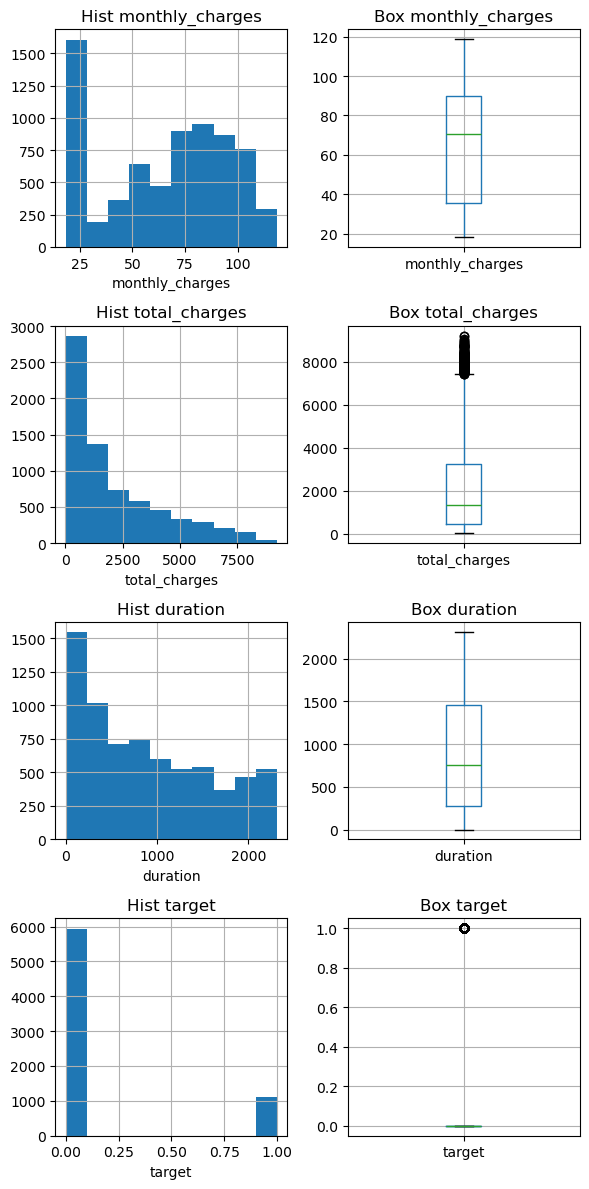

In [28]:
num_research(data)

In [29]:
data.describe()

,monthly_charges,total_charges,duration,target
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.377573,898.555729,0.156325
std,30.090047,2112.678861,683.130510,0.363189
min,18.250000,19.050000,0.000000,0.000000
25%,35.500000,436.750000,276.000000,0.000000
50%,70.350000,1343.350000,761.000000,0.000000
75%,89.850000,3236.690000,1461.000000,0.000000
max,118.750000,9221.380000,2314.000000,1.000000


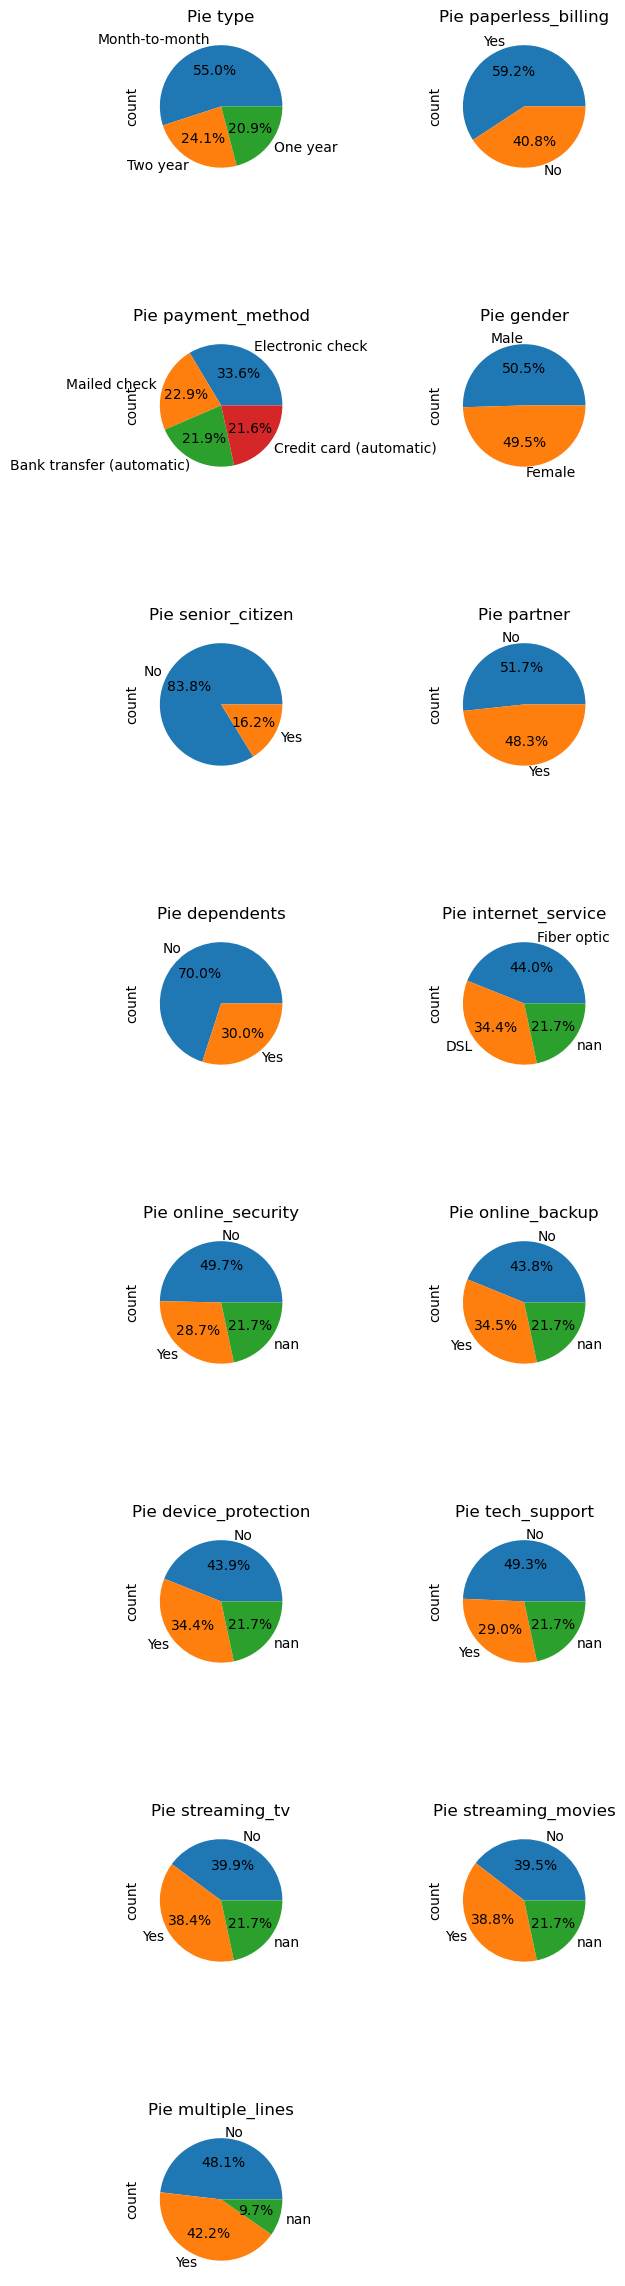

In [30]:
pie(data);

In [31]:
# Проверка пропусков
data.isna().sum()

customer_id             0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
duration                0
target                  0
dtype: int64

In [32]:
# Пропуски образовались после слияния и ознаечают отсутсвие подключенное услуги, поэтому будут заполнены полем "No"

columns_to_fill = [
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'
]
data[columns_to_fill] = data[columns_to_fill].fillna('No')
# Нельзя однозначно обосновать заполнение столбца internet_service, поэтому используем значение "Unkown"
data['internet_service'] = data['internet_service'].fillna('Unkown')

In [33]:
# Проверка пропусков
data.isna().sum()

customer_id          0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
duration             0
target               0
dtype: int64

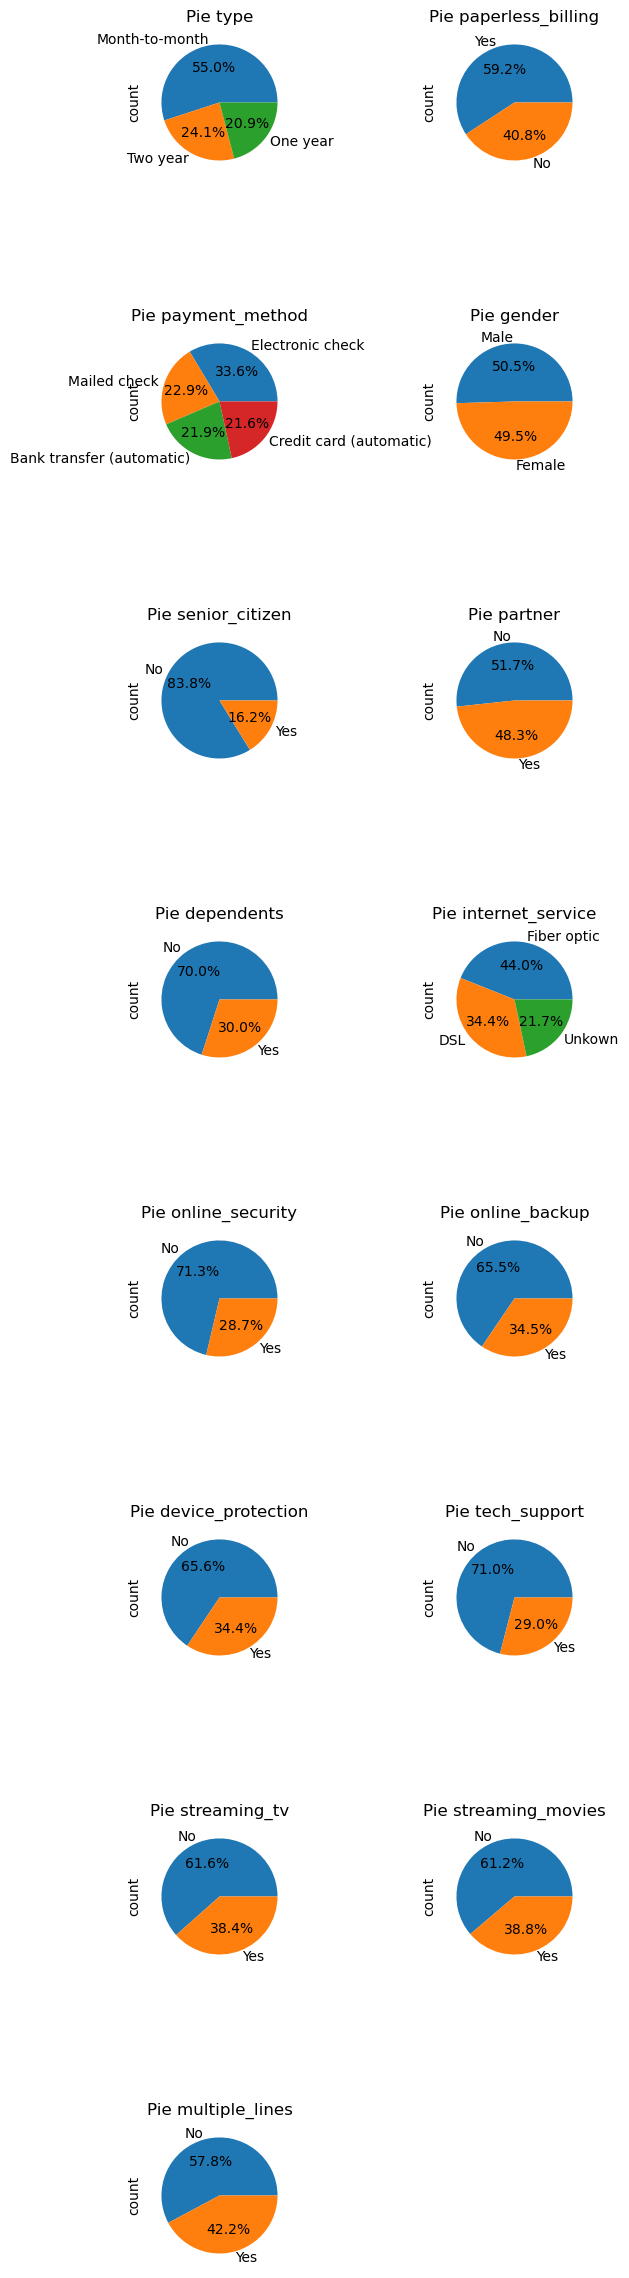

In [34]:
pie(data);

In [35]:
# Поиск дубликатов и их удаление
print('Количество дубликатов до форматирования:', data.duplicated().sum())
data = data.drop_duplicates()
print('Количество дубликатов после форматирования:', data.duplicated().sum())

Количество дубликатов до форматирования: 0
Количество дубликатов после форматирования: 0


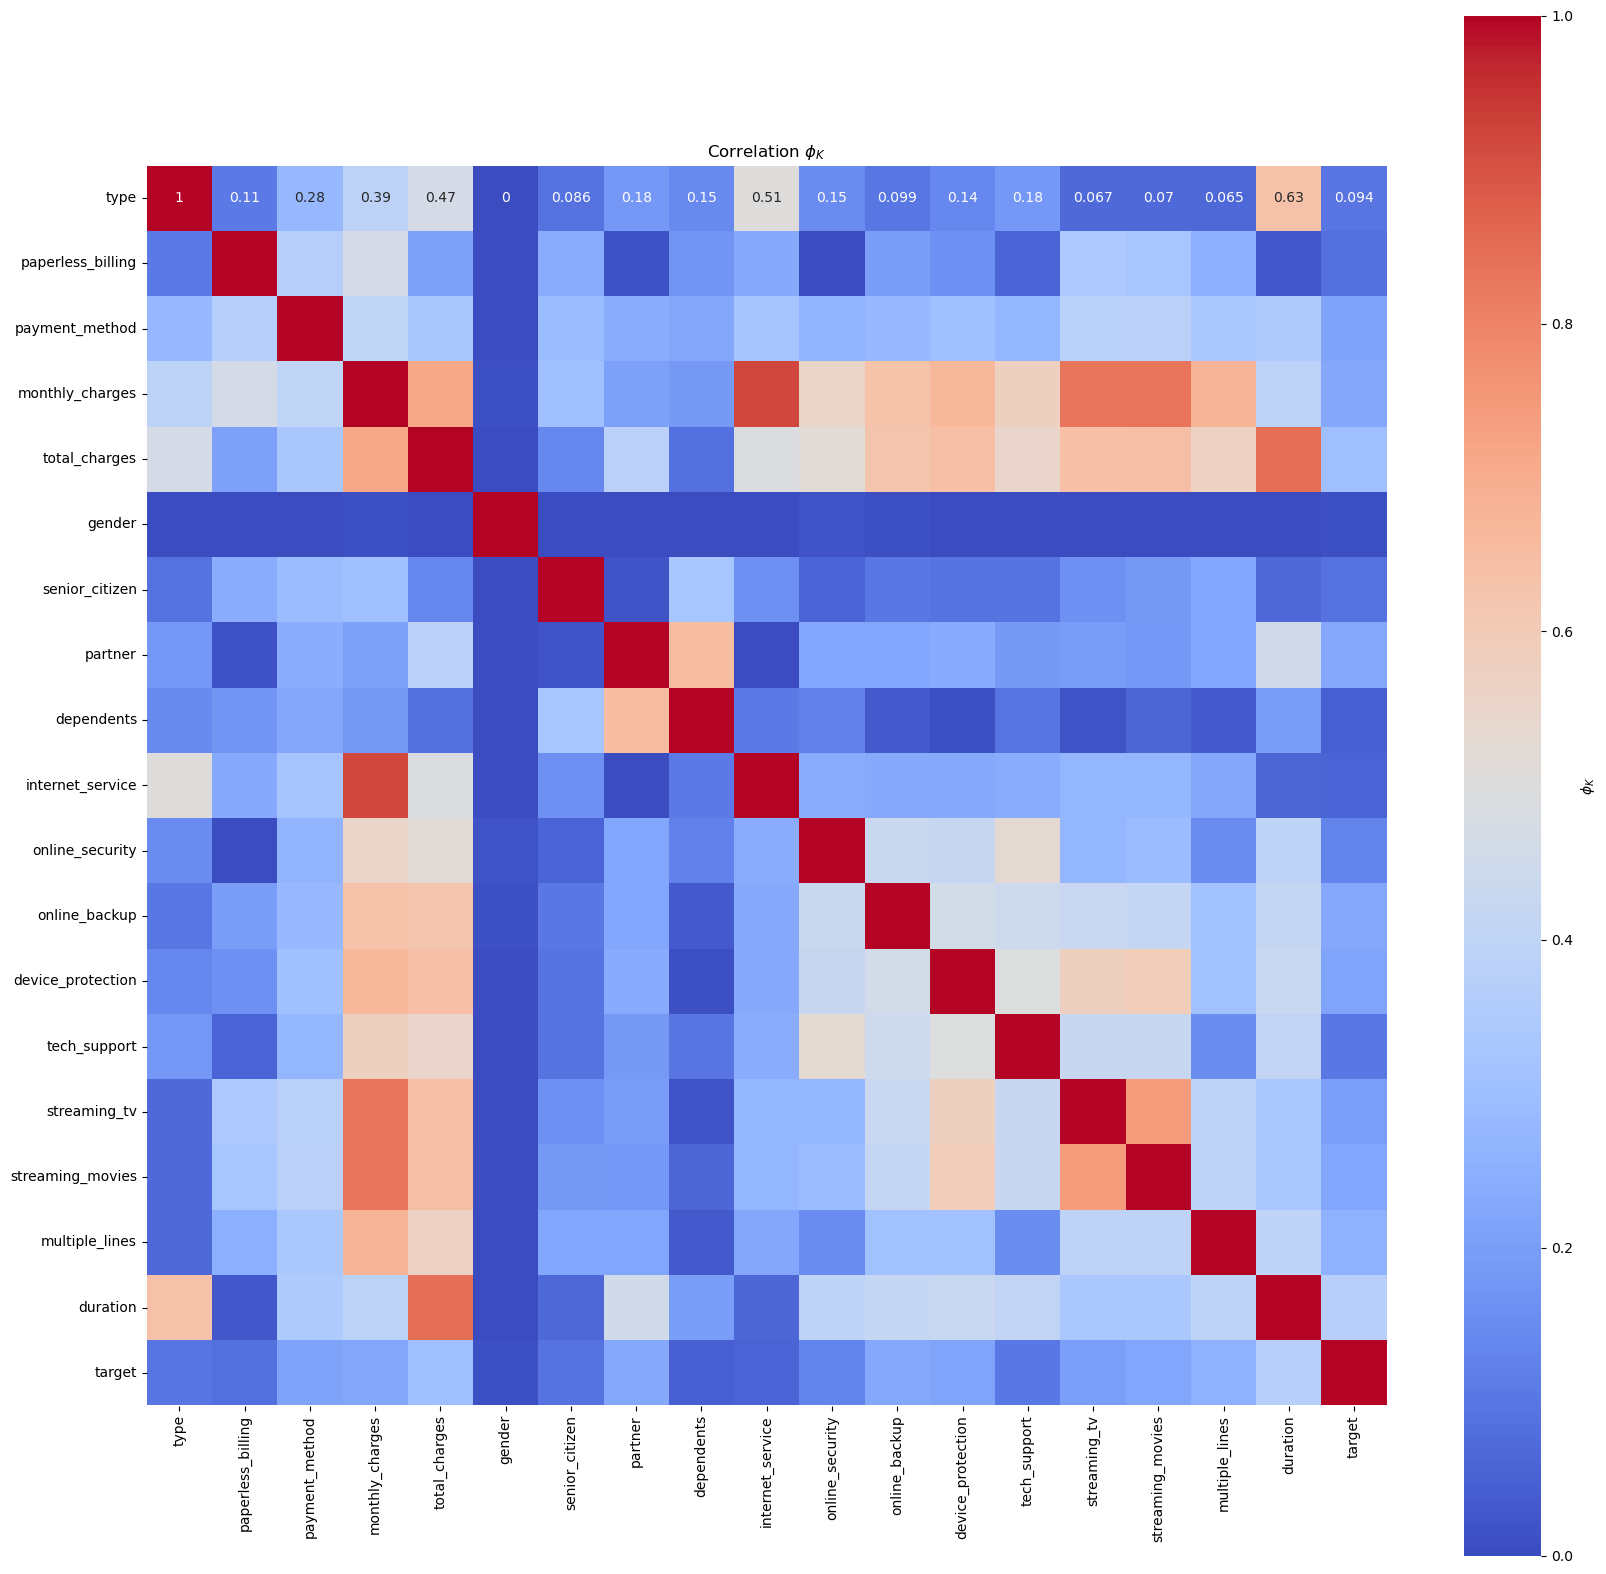

In [36]:
# Матрица корреляции
interval_cols = ['monthly_charges', 'total_charges', 'duration']
phik_overview = data.loc[:, data.columns != 'customer_id'].phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(20, 20))
sns.heatmap(
    phik_overview.values,
    cmap='coolwarm',
    annot=True,
    square=True,
    cbar_kws={'label': r'$\phi_K$'},
    xticklabels=phik_overview.columns,
    yticklabels=phik_overview.index
)
plt.title(r"Correlation $\phi_K$")
plt.show()

**Вывод:** 
- Анализ мультиколлинеарности среди числовых признаков: В таблице корреляции можно заметить, что некоторые пары признаков имеют более высокую корреляцию между собой. Например, monthly_charges и total_charges демонстрируют достаточно сильную положительную корреляцию. Это логично, поскольку общие расходы (total_charges) зависят от месячных затрат (monthly_charges) и длительности пользования услугой. Однако, в целом, мультиколлинеарность среди остальных признаков незначительна, так как корреляция между большинством пар признаков низкая. Это говорит о том, что большинство числовых признаков относительно независимы друг от друга.

- Признаки, наименее влияющие на целевую переменную: признаки, такие как gender и dependents, показывают очень низкую корреляцию с целевым признаком. Это указывает на то, что данные признаки практически не оказывают влияния на вероятность оттока клиента. Также можно заметить низкое влияние таких признаков, как device_protection, streaming_tv, и streaming_movies, что предполагает, что наличие или отсутствие этих услуг мало влияет на решение клиента остаться или уйти.

- Признаки с максимальным влиянием на целевую переменную: duration демонстрирует наибольшую отрицательную корреляцию с оттоком, что может указывать на высокий риск ухода у клиентов с менее продолжительными контрактами. Также некоторые финансовые характеристики, такие как monthly_charges, total_charges, partner, оказывают умеренное влияние на отток, что может говорить о повышенной вероятности оттока для клиентов с высокими ежемесячными затратами.

### Шаг 4.2. Исследовательский анализ оставшихся клиентов

In [37]:
remaining_clients = data[data['target'] == 0]

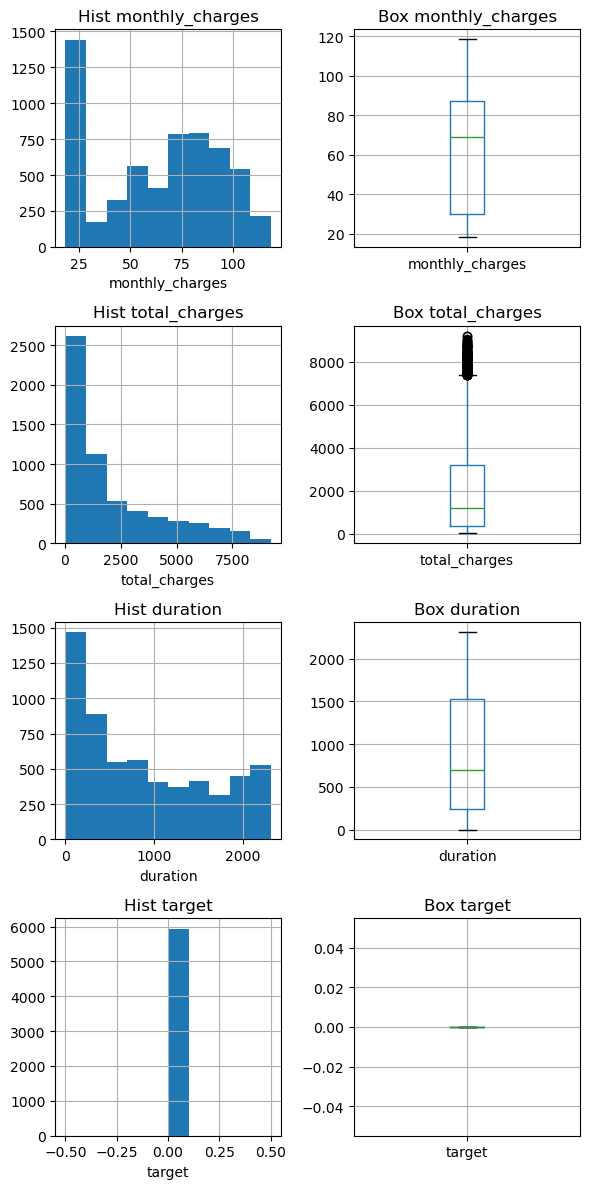

In [38]:
num_research(remaining_clients)

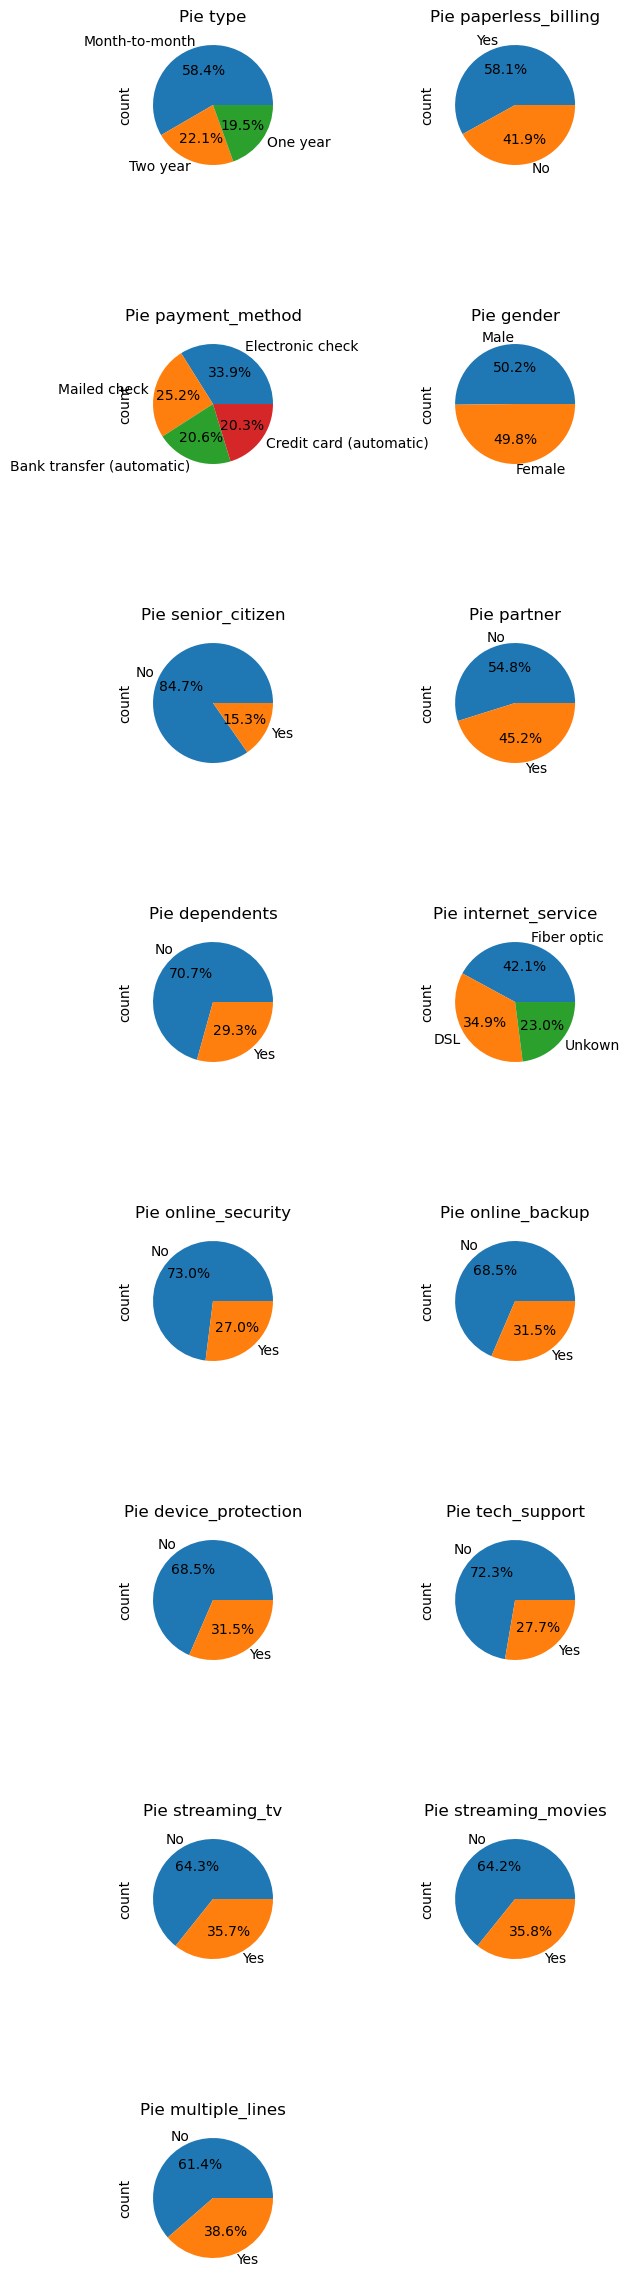

In [39]:
pie(remaining_clients)

### Шаг 4.3. Исследовательский анализ ушедших клиентов

In [40]:
departed_clients = data[data['target'] == 1]

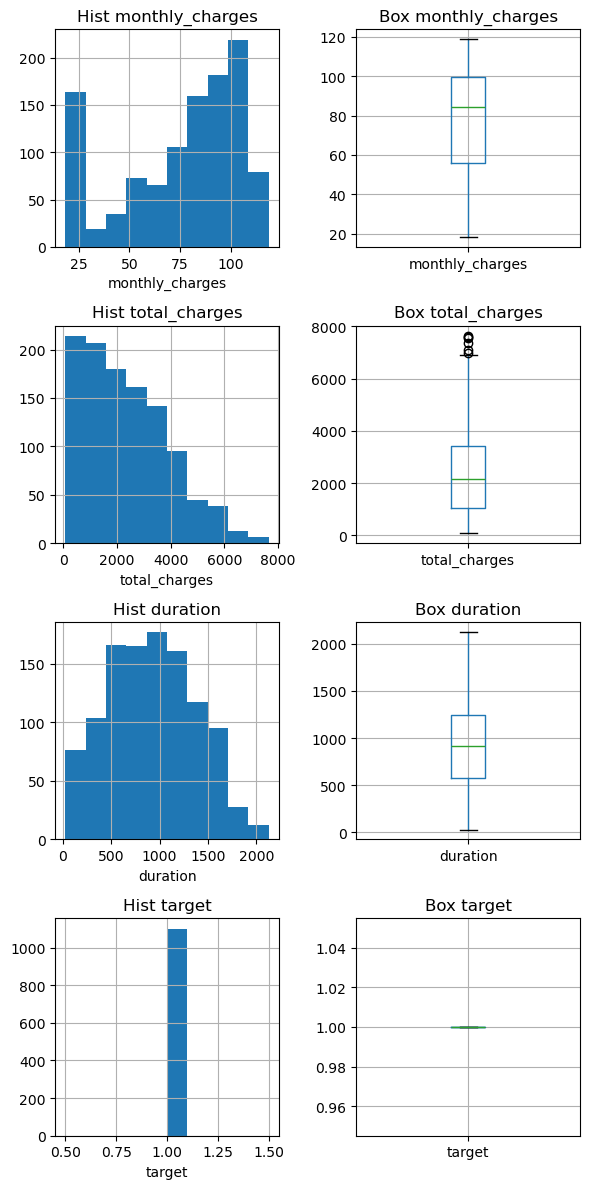

In [41]:
num_research(departed_clients)

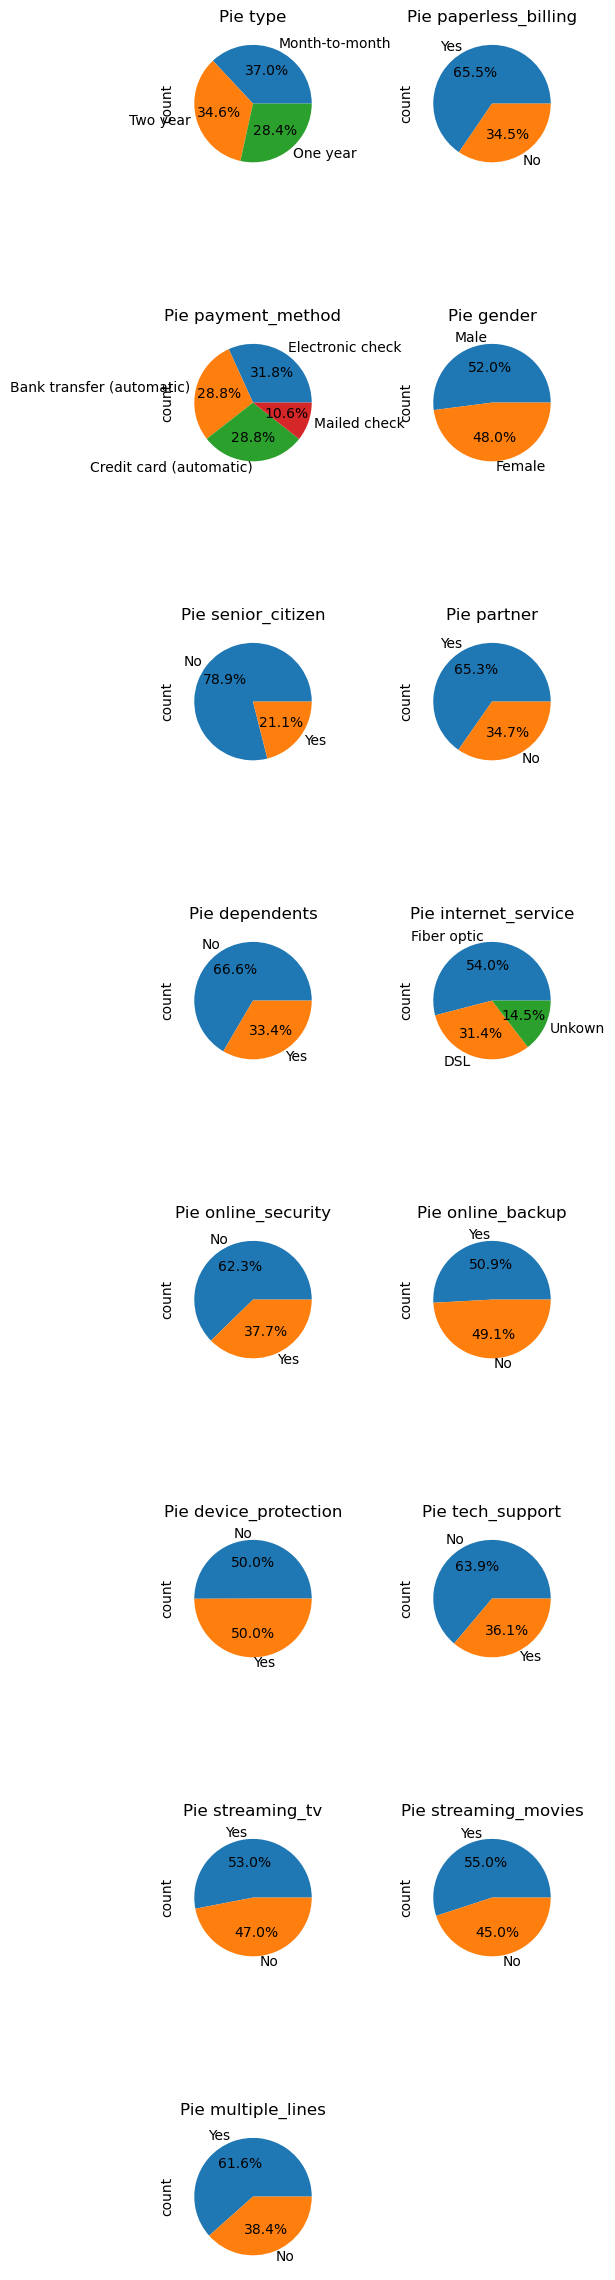

In [42]:
pie(departed_clients)

**Вывод:** 
- Матрица корреляции:
    - Анализ мультиколлинеарности среди числовых признаков: В таблице корреляции можно заметить, что некоторые пары признаков имеют более высокую корреляцию между собой. Например, monthly_charges и total_charges демонстрируют достаточно сильную положительную корреляцию. Это логично, поскольку общие расходы (total_charges) зависят от месячных затрат (monthly_charges) и длительности пользования услугой. Однако, в целом, мультиколлинеарность среди остальных признаков незначительна, так как корреляция между большинством пар признаков низкая. Это говорит о том, что большинство числовых признаков относительно независимы друг от друга.
    
    - Признаки, наименее влияющие на целевую переменную: признаки, такие как gender и dependents, показывают очень низкую корреляцию с целевым признаком. Это указывает на то, что данные признаки практически не оказывают влияния на вероятность оттока клиента. Также можно заметить низкое влияние таких признаков, как device_protection, streaming_tv, и streaming_movies, что предполагает, что наличие или отсутствие этих услуг мало влияет на решение клиента остаться или уйти.
    
    - Признаки с максимальным влиянием на целевую переменную: duration демонстрирует наибольшую отрицательную корреляцию с оттоком, что может указывать на высокий риск ухода у клиентов с менее продолжительными контрактами. Также некоторые финансовые характеристики, такие как monthly_charges, total_charges, partner, оказывают умеренное влияние на отток, что может говорить о повышенной вероятности оттока для клиентов с высокими ежемесячными затратами.

- Финансовые показатели:
    - Распределение monthly_charges показывает, что значительное число клиентов платит относительно небольшие суммы в месяц (20–30).
    - total_charges смещены влево: большинство клиентов имеют невысокие общие расходы, что может быть связано с недавними контрактами.

- Использование услуг:
    - Большинство клиентов не пользуются дополнительными услугами, такими как online_security, tech_support, streaming_tv, и streaming_movies.
    - Примерно 42% клиентов используют несколько телефонных линий, но большинство остаются на стандартном подключении.
    - Наибольший интерес у ушедших клиентов вызывали стриминговые сервисы (особенно фильмы), многолинейная связь и оптоволоконный интернет. Среди услуг безопасности и технической поддержки наблюдается умеренный интерес.

- Рекомендации:
    - Сфокусироваться на удержании новых клиентов с коротким сроком контракта.
    - Рассмотреть акции или пакеты для популяризации дополнительных услуг (online_security, tech_support) и сделать их более привлекательными для клиентов.

## Подготовка данных

In [43]:
RANDOM_STATE = 121124
TEST_SIZE = 0.25

In [44]:
features = data.drop(['target', 'customer_id'], axis=1)
target = data['target']
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [45]:
features.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration
0,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,No,31.0
1,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No,1036.0
2,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No,123.0
3,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371.0
4,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,153.0


In [46]:
ohe_columns = features.select_dtypes(include=['object']).columns
num_columns = ['monthly_charges', 'total_charges', 'duration']

ohe_pipe = Pipeline(
    [
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

**Вывод:** На данном этапе был подготовлен пайплайн для предобработки данных: разделены признаки на категориальные и числовые, для категориальных применено кодирование OneHotEncoder с заполнением пропусков, а для числовых — стандартное масштабирование с помощью StandardScaler. Также данные были разделены на тренировочную и тестовую выборки с использованием стратифицированного разбиения.

## Обучение моделей машинного обучения

In [47]:
%%time

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # LogisticRegression
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': [1, 10, 50, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # KNeighborsClassifier
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(10, 50, 2),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # HistGradientBoostingClassifier
    {
        'models': [HistGradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__max_iter': range(100, 500, 100),          
        'models__max_depth': range(2, 16),                  
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_iter=432,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

CPU times: user 12.2 s, sys: 6.62 s, total: 18.9 s
Wall time: 40.9 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               Index(['type', 'paperless_billing', 'payment_method', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'onlin...
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(10, 50, 2),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [HistGradientBoostingClassifier(random_state=121124)],
                                         'models__max_depth': range(2, 16),
                                         'models__max_iter': range(100, 500, 100),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=121124, scoring='roc_auc')

In [48]:
# Вообще лучший результат показал CatBoostClassifier с метрикой ROC AUC 0.92+, но обучение длилось слишком долго, 
# поэтому было принято решение взять HistGradientBoostingClassifier, так как он показывает необходимый уровень 0.85+ за ~ минуту

**Вывод:** На этапе обучение моделей машинного обучения был создан пайплайн для подбора гиперпараметров нескольких моделей, включая LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier и HistGradientBoostingClassifier. Для каждой модели подбирались ключевые гиперпараметры с кросс-валидацией, чтобы найти наилучшее значение roc_auc.

## Выбор лучшей модели

In [49]:
best_results = {}

for param in param_grid:
    model_class = param['models'][0].__class__.__name__  
    mask = [
        str(m).startswith(model_class) 
        for m in randomized_search.cv_results_['param_models']
    ]
    if any(mask):
        best_score = max(randomized_search.cv_results_['mean_test_score'][mask])
        best_results[model_class] = best_score

for model, score in best_results.items():
    print(f"Лучший ROC AUC для {model}: {score:.4f}")

Лучший ROC AUC для LogisticRegression: 0.7709
Лучший ROC AUC для DecisionTreeClassifier: 0.7780
Лучший ROC AUC для KNeighborsClassifier: 0.8001
Лучший ROC AUC для HistGradientBoostingClassifier: 0.8754


In [50]:
best_model_name = max(best_results, key=best_results.get)
print(f"Лучшая модель: {best_model_name} с ROC AUC: {best_results[best_model_name]:.4f}")

best_model_instance = None
for param in param_grid:
    if param['models'][0].__class__.__name__ == best_model_name:
        best_model_instance = param['models'][0]
        break

pipe_best = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', best_model_instance)
])

pipe_best.fit(X_train, y_train)
y_pred_proba = pipe_best.predict_proba(X_test)[:, 1]
print("ROC AUC на тестовой выборке:", roc_auc_score(y_test, y_pred_proba))

Лучшая модель: HistGradientBoostingClassifier с ROC AUC: 0.8754
ROC AUC на тестовой выборке: 0.8516052856968065


**Вывод:** После подбора гиперпараметров с помощью RandomizedSearchCV лучшей моделью оказалась HistGradientBoostingClassifier, показавшая наивысший ROC AUC на cv выборке (0.8754). Затем модель была применена к тестовым данным с окончательной метрикой ROC AUC на тестовой выборке 0.8516, что подтверждает её стабильность и высокое качество предсказаний, а также соответсвует критерию оценивания (>=0.85).

## Общий вывод и рекомендации заказчику

В ходе работы была разработана и протестирована модель для прогнозирования вероятности оттока клиентов компании "ТелеДом". Основные этапы работы включали:

- На этапе загрузки данных было выявлено, что данные соответствуют описанию задачи. Названия и типы некоторых столбцов необходимо будет изменить в соответствии со стандартами оформления данных на этапе предобработки.
- На этапе предобработке данных названия столбцов и их типы данных были приведены к нормальному виду во всех датафремах. Явные дубликаты отсутствовали. Пропуски в данных заполнены.
- На этом этапе объединения таблиц была создана итоговая таблица данных с полным набором признаков, что упростило дальнейшую обработку и анализ. Признаки длительности контракта и оттока позволили создать основы для классификационного анализа и предсказания завершения договора.
- Исследовательский анализ:
    - Матрица корреляции:
        - Анализ мультиколлинеарности среди числовых признаков: В таблице корреляции можно заметить, что некоторые пары признаков имеют более высокую корреляцию между собой. Например, monthly_charges и total_charges демонстрируют достаточно сильную положительную корреляцию. Это логично, поскольку общие расходы (total_charges) зависят от месячных затрат (monthly_charges) и длительности пользования услугой. Однако, в целом, мультиколлинеарность среди остальных признаков незначительна, так как корреляция между большинством пар признаков низкая. Это говорит о том, что большинство числовых признаков относительно независимы друг от друга.
        
        - Признаки, наименее влияющие на целевую переменную: признаки, такие как gender и dependents, показывают очень низкую корреляцию с целевым признаком. Это указывает на то, что данные признаки практически не оказывают влияния на вероятность оттока клиента. Также можно заметить низкое влияние таких признаков, как device_protection, streaming_tv, и streaming_movies, что предполагает, что наличие или отсутствие этих услуг мало влияет на решение клиента остаться или уйти.
        
        - Признаки с максимальным влиянием на целевую переменную: duration демонстрирует наибольшую отрицательную корреляцию с оттоком, что может указывать на высокий риск ухода у клиентов с менее продолжительными контрактами. Также некоторые финансовые характеристики, такие как monthly_charges, total_charges, partner, оказывают умеренное влияние на отток, что может говорить о повышенной вероятности оттока для клиентов с высокими ежемесячными затратами.
    
    - Финансовые показатели:
        - Распределение monthly_charges показывает, что значительное число клиентов платит относительно небольшие суммы в месяц (20–30).
        - total_charges смещены влево: большинство клиентов имеют невысокие общие расходы, что может быть связано с недавними контрактами.
    
    - Использование услуг:
        - Большинство клиентов не пользуются дополнительными услугами, такими как online_security, tech_support, streaming_tv, и streaming_movies.
        - Примерно 42% клиентов используют несколько телефонных линий, но большинство остаются на стандартном подключении.
    
    - Рекомендации:
        - Сфокусироваться на удержании новых клиентов с коротким сроком контракта.
        - Рассмотреть акции или пакеты для популяризации дополнительных услуг (online_security, tech_support) и сделать их более привлекательными для клиентов.
- На этапе подготовки данных был подготовлен пайплайн для предобработки данных: разделены признаки на категориальные и числовые, для категориальных применено кодирование OneHotEncoder, а для числовых — стандартное масштабирование с помощью StandardScaler. Также данные были разделены на тренировочную и тестовую выборки с использованием стратифицированного разбиения.
- На этапе обучение моделей машинного обучения был создан пайплайн для подбора гиперпараметров нескольких моделей, включая LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier и HistGradientBoostingClassifier. Для каждой модели подбирались ключевые гиперпараметры с кросс-валидацией, чтобы найти наилучшее значение roc_auc.
- После подбора гиперпараметров с помощью RandomizedSearchCV лучшей моделью оказалась HistGradientBoostingClassifier, показавшая наивысший ROC AUC на cv выборке (0.8754). Затем модель была применена к тестовым данным с окончательной метрикой ROC AUC на тестовой выборке 0.8516, что подтверждает её стабильность и высокое качество предсказаний, а также соответсвует критерию оценивания (>=0.85).


- Рекомендации:
    
    - Предложить клиентам с коротким сроком контракта льготные условия на услуги Online Security и Tech Support, чтобы повысить их лояльность.
    
    - Создать выгодные пакеты, включающие несколько услуг (например, Tech Support + Device Protection или Streaming TV + Streaming Movies) для повышения вовлеченности.
    
    - Провести кампании по популяризации таких услуг, как Online Security и Device Protection, особенно среди новых клиентов и тех, кто платит высокие ежемесячные тарифы.
    
    - Клиенты с несколькими телефонными линиями могут быть более заинтересованы в дополнительных сервисах. Целевые предложения для этой группы помогут снизить отток.